### Domain : E-commerce

### Context :
Everyday a million products are being recommended to users based on
popularity and other metrics on e-commerce websites. The most popular e-commerce website boosts average order value by 50%, increases revenues by 300%, and improves conversion. In addition to being a powerful tool for increasing revenues, product recommendations are so essential that customers now expect to see similar features on all other eCommerce sites.

### Data Description :
Data columns- First three columns are userId, productId, and ratings and the fourth column is timestamp. You can discard the timestamp column as in this case you may not need to use it.

### Source :
Amazon Reviews data (http://jmcauley.ucsd.edu/data/amazon/) The repository has several datasets. For this case study, we are using the Electronics
dataset.

### Learning Outcomes :
● ExploratoryDataAnalysis
● DataWrangling
● BuildaPopularityrecommendermodel 
● BuildCollaborativeFilteringmodel

### Objective : 
To make a recommendation system that recommends at least five(5) new products based on the user's habits.

### Criteria	Points :

Read and explore the given dataset. ( Rename column/add headers, plot histograms, find data characteristics)
10

Take a subset of the dataset to make it less sparse/ denser.
5

Build Popularity Recommender model
10

Split the data randomly into train and test dataset
2

Build Collaborative Filtering model
10

Evaluate the above model
3

Get top - K ( K = 5) recommendations. Recommend 5 new products
10

Summarise your insights
10

### 1. Read and explore the given dataset. ( Rename column/add headers, plot histograms, find data characteristics)

In [1]:
#import required libraries
import numpy as np  
import pandas as pd

#read the data
#column_names = ['userID','productID','ratings','timestamp']
#df = pd.read_csv("ratings_Electronics_sample.csv",names = column_names) 

df1 = pd.read_csv("Electronic_dataset.csv") 

#check dataset head
df1.head() 

,user_id,prod_id,ratings,timestamp
0,A3L1GVWVJKWZZS,B0058UUR6E,5.0,1364774400
1,A08831071BVKZMKNCPI5S,B009ID0VVS,5.0,1357257600
2,A1SINU2I4IOPNU,B000GBO9IM,4.0,1358121600
3,A3P3P31EEOX2BD,B00CDCIOHO,3.0,1404950400
4,A3DBLJ3MPBJQMN,B000MS3VGA,5.0,1294444800


In [2]:
#dropping timestamp
df1.drop('timestamp', axis = 1, inplace = True)

In [3]:
df1.shape

(500000, 3)

The dataset is large , has 5 lac records

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 3 columns):
user_id    500000 non-null object
prod_id    500000 non-null object
ratings    500000 non-null float64
dtypes: float64(1), object(2)
memory usage: 11.4+ MB


In [5]:
# list productwise entries in dataframe
df1['prod_id'].value_counts(ascending= False)

B0074BW614    1138
B00DR0PDNE    1094
B007WTAJTO     883
B0019EHU8G     774
B006GWO5WK     770
              ... 
B009S0Q4RQ       1
B004B8VIRG       1
B00AWA1DH2       1
B00005UNA8       1
B00BSLUP6Y       1
Name: prod_id, Length: 130138, dtype: int64

In [6]:
# Lets check unique values or ratings
df1.ratings.unique()

array([5., 4., 3., 1., 2.])

So there are 5 unique ratings given by users - 1 through 5

In [7]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
ratings,500000.0,4.013172,1.379996,1.0,3.0,5.0,5.0,5.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc4b7488f60>]],
      dtype=object)

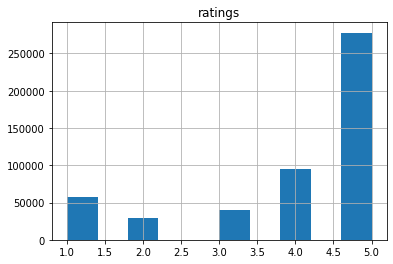

In [8]:
df1.hist()

It is evident that most coomon rating given is 5, followed by 4 and 1

In [9]:
# count unique users in the dataset
users = df1['user_id'].unique()
len(users)

448368

there are 448368 unique user IDs

In [10]:
# count unique products in the dataset
products = df1['prod_id'].unique()
len(products)

130138

and there are 130138 unique product Ids

In [11]:
#Lets check mean ratings per product
df1.groupby('prod_id')['ratings'].mean().head()  

prod_id
0439886341    1.0
0528881469    5.0
0594012015    5.0
0594033926    5.0
0594451647    5.0
Name: ratings, dtype: float64

In [12]:
# Lets check Top 10 users who rated most products
counts = df1['user_id'].value_counts(ascending= False)
counts[:10]

A680RUE1FDO8B     36
A3OXHLG6DIBRW8    34
ADLVFFE4VBT8      30
A5JLAU2ARJ0BO     29
A2NOW4U7W3F7RI    28
A231WM2Z2JL0U3    24
A2AY4YUOX2N1BQ    23
A6FIAB28IS79      23
A4WEZJOIZIV4U     22
A1ODOGXEYECQQ8    21
Name: user_id, dtype: int64

So the user A680RUE1FDO8B has rated highest numner of products (36)

### 2 Take a subset of the dataset to make it less sparse/ denser.

In [13]:
# Since the initial dataset is sparce, take only users who have rated 3 or more items to make it less sparse

df1_final=df1[df1.user_id.isin(counts[counts>= 3].index)]
print('Number of users who have rated 3 or more items =', len(df1_final))
print('Number of unique users in the new set  = ', df1_final['user_id'].nunique())
print('Number of unique products in the new set = ', df1_final['prod_id'].nunique())

Number of users who have rated 3 or more items = 30603
Number of unique users in the new set  =  8109
Number of unique products in the new set =  19900


In [14]:
df1_final.shape

(30603, 3)

This new dataset has only 30603 records and contains users who have atleast rated 3 products. This is much denser than our original dataset.

### 3. Build Popularity Recommender model 

In [15]:
# For popularity based Recommendation System we are only interested in items that are highly rated by most users
# so we can use the original sparse dataset for this purpose
df2 = df1.copy()

In [16]:
product_grouped = df2.groupby(['prod_id']).agg({'ratings': 'count'}).reset_index()
product_grouped.sort_values(by = 'ratings', ascending = False).head(5)

,prod_id,ratings
90638,B0074BW614,1138
120766,B00DR0PDNE,1094
95656,B007WTAJTO,883
31800,B0019EHU8G,774
87388,B006GWO5WK,770


###  4. Split the data randomly into train and test dataset

In [17]:
from surprise import Dataset,Reader
from surprise.model_selection import cross_validate
from surprise import NormalPredictor


reader = Reader(rating_scale=(1, 5))

In [18]:
# Transform data to Surprise format
# Note : columns must correspond to user id, item id and ratings (in that order)

data = Dataset.load_from_df(df1_final, reader) 
# Since i am going to use SVD which can handle sparse data i am using the original sparse datset here

In [19]:
data.df.head()

,user_id,prod_id,ratings
16,A36OQE3RAOO63J,B001CZ5BOW,5.0
26,A2HX3D3MPPASNS,B004I3VZM2,4.0
39,A15U8KHV4J5DIK,B002BH4QNC,2.0
64,A3PAYT2SQY7J3H,B002WR7VSS,5.0
67,A3MLSY6VS7AB8O,B001IBHF5S,5.0


In [20]:
# Split the data into train and test

from surprise.model_selection import train_test_split

trainset, testset = train_test_split(data, test_size=.25)

### 5. Build Collaborative Filtering model 

In [21]:
# Train model on SVD

from surprise import SVD
algo = SVD()
algo.fit(trainset)

In [28]:
predictions = algo.test(testset)
#predictions

### 6. Evaluate the above model

In [23]:
# Test Accuracy of the model

from surprise import accuracy
accuracy.rmse(predictions)

RMSE: 1.1559


1.155914180190888

In [24]:
#  We can also Run 5-fold cross-validation and print results for RMSE and MAE

cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.1429  1.1374  1.1309  1.1206  1.1398  1.1343  0.0079  
MAE (testset)     0.8714  0.8710  0.8706  0.8667  0.8751  0.8710  0.0027  
Fit time          1.80    1.83    1.88    1.82    1.79    1.82    0.03    
Test time         0.05    0.06    0.05    0.06    0.05    0.05    0.00    


{'test_rmse': array([1.14289639, 1.13735061, 1.13091856, 1.12063295, 1.13981333]),
 'test_mae': array([0.87142913, 0.8709698 , 0.87061174, 0.86673157, 0.87514202]),
 'fit_time': (1.7973408699035645,
  1.8255510330200195,
  1.8772199153900146,
  1.8205351829528809,
  1.7921407222747803),
 'test_time': (0.053236961364746094,
  0.056237220764160156,
  0.0512850284576416,
  0.057540178298950195,
  0.050588130950927734)}

### 7. Get top - K ( K = 5) recommendations. Recommend 5 new products

In [25]:
from collections import defaultdict

def get_top_n(predictions, useridx,  n=5):
    """Return the top-N recommendation for  user id passed 'useridx' from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        useridx : User ID for which we are interested to predict recommendtions
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) id which we pass and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    """

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        if uid == useridx:
            top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [26]:
# pass the user id  and the no of recommendations n=5
# use SVN based model
uid = 'A680RUE1FDO8B' # user id for which we want to predict top 5 recommendations
top_n = get_top_n(predictions,useridx = uid, n= 5)
top_n

defaultdict(list,
            {'A680RUE1FDO8B': [('B0019EHU8G', 4.727418794948331),
              ('B000RZQZM0', 4.595488643742187),
              ('B004ABO7QI', 4.468982238471333),
              ('B007YX9O94', 4.465635407694814),
              ('B0098G9LHU', 4.342148516403322)]})

In [27]:
# pass the user id  and the no of recommendations n=5
# use SVN based model
uid = 'ADZEWNYAKTAWG' # user id for which we want to predict top 5 recommendations
top_n = get_top_n(predictions,useridx = uid, n= 5)
top_n

defaultdict(list,
            {'ADZEWNYAKTAWG': [('B001L1H0SC', 4.490945502580667),
              ('B0014KKV7W', 4.198951146393534)]})

### Summarise your insights

1. The original dataset was sparse, with a lot of users just rating few items. We made it less sparse/denser by keeping only user records who rated atleast 3 or more products. 
2. Popularity based recommendation are non-personalized. Every user gets same recommendation. We have listed the top 5 products that are highly rated. These items will be recommended as 'popular items' to all users. This aopproach helps us addrress the cold start problem and is good to start with.
3. We created an Matrix Factorization based Collaborative Recommendation System using SVD and Surprise Library. SVD can work well on huge datasets and is better at dealing with sparsity.
4. We got RMSE of 1.15 with SVD Model based Collborative Recommendation 
5. Using the SVD model we are able to recommend  5 products for some users. However, as seen on second example for another user this model was able to predict only two products. The denser our dataset is the better the model would work.
